<h1> Question 1 - DFT and FFT </h1>

1. The dft1() function calculates the discrete fourier transform of a 1D array using the formula: <br>
X[k] = Σₙ x[n] * e^(-j (2π/N)kn) <br>

2. The dft2() function calculates the fourier transform of a 2D image using the previously implemented dft1() function by passing the rows and columns of the image separately. <br>
X[u, v] = Σₘ Σₙ x[m, n] * e^(-j (2π/M)um) * e^(-j (2π/N)vn)

3. The Fast Fourier Transform is a more efficient way fo computing the fourier transform of an image(or array). The algorithm involves dividing the array into even and odd halves.<br>
For this to work, the input array needs to be a power of 2 so we pad it appropriately using np.pad()

4. fft2() is also implemented using the same logic of passing the rows and columns of the  image into the fft1() function separately, while handling padding.

5. From the plot of run-time VS size of input array, we see that FFT function is much faster than the DFT function and is also almost independent of input array size. On the other hand, the DFT functions run-time increases with an increase in the size of the input array.

6. The different pixel intensities have been plotted and their DFT's have been computed.

7. We observe that when we display the DFT of the DFT, we get almost the original image back (but reversed). When done on an array, we get back the circularly reversed array back.

8. The ifft2() function is implemented by taking the conjugate of the input array, fft of the conjugate and the normalising it to give the output. Padding has also been taken care of in the function.

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def dft1(arr):
    N = arr.shape[0]
    X = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        X[k] = sum(arr[n] * np.exp(-2j * np.pi * k * n / N) for n in range(N))

    return X

def dft2(arr):
    M, N = arr.shape
    X = np.zeros((M, N), dtype=np.complex128)

    #row
    for m in range(M):
        X[m, :] = dft1(arr[m, :])
    #column
    for n in range(N):
        X[:, n] = dft1(X[:, n])

    return X

def fft1(arr):
    N = arr.shape[0]

    if N == 1:
        return arr
    #not power of 2
    if (N and (not(N & (N - 1)))) != True:
        pad = 2**np.ceil(np.log2(N))
        arr = np.concatenate(arr,np.zeros((1,(pad - N))))

    X = np.zeros(N, dtype=np.complex128)

    even = fft1(arr[0:N:2])
    odd = fft1(arr[1:N:2])

    for k in range(N//2):
        w = np.exp(-2j*np.pi * k/N)
        X[k] = even[k] + (w * odd[k])
        X[k + N//2] = even[k] - (w * odd[k])

    return X

[0.019440889358520508, 0.062222957611083984, 0.2419288158416748, 0.9666078090667725]
[0.0007851123809814453, 0.001689910888671875, 0.0036840438842773438, 0.007679939270019531]


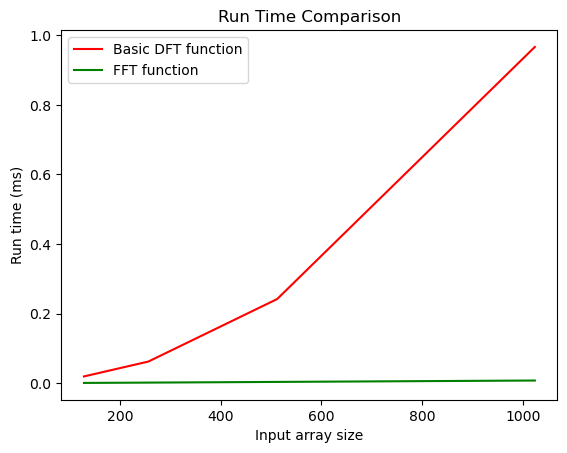

In [5]:
#comparing time for both algorithms
import time 

# for mean filter
size = [128, 256, 512, 1024]
times1 = []
times2 = []
for i in range(4):
    array = np.random.rand(size[i])
    start = time.time()
    output = dft1(array)
    end = time.time()
    times1.append(end - start)
    
    start = time.time()
    output = fft1(array)
    end = time.time()
    times2.append(end - start)

print(times1)
print(times2)
plt.figure()
plt.plot(size,times1, color='r', label = 'Basic DFT function')
plt.plot(size,times2, color='g', label = 'FFT function')
plt.title("Run Time Comparison")
plt.xlabel("Input array size")
plt.ylabel("Run time (ms)")
plt.legend()
plt.show()

In [15]:
def fft1(arr):
    N = arr.shape[0]

    if N == 1:
        return arr
    X = np.zeros(N, dtype=np.complex128)

    even = fft1(arr[0:N:2])
    odd = fft1(arr[1:N:2])

    for k in range(N//2):
        w = np.exp(-2j*np.pi * k/N)
        X[k] = even[k] + (w * odd[k])
        X[k + N//2] = even[k] - (w * odd[k])

    return X

def fft2(arr):
    M, N = arr.shape[0:2]
    
    #check if N is not a power of 2
    if (N & (N - 1) != 0) or (M & (M - 1) != 0):
        padx, pady = 2**np.ceil(np.log2(M)), 2**np.ceil(np.log2(N)) #smallest power of 2
        arr = np.pad(arr, ((0, int(padx) - M), (0, int(pady) - N)), mode='constant')
        X = np.zeros((int(padx), int(pady)), dtype=np.complex128)
    else: 
        X = np.zeros((M, N), dtype=np.complex128)
        padx = M
        pady = N
    
    #row
    for m in range(int(padx)):
        X[m, :] = fft1(arr[m, :])
    #column
    for n in range(int(pady)):
        X[:, n] = fft1(X[:, n])
    
    return X

def ifft1(arr):
    N = len(arr)

    if N <= 1:
        return arr

    # Conjugate the input
    arr = np.conjugate(arr)
    arr = fft1(arr)
    
    return np.conjugate(arr) / N

def ifft2(arr):
    M, N = arr.shape
    X = np.zeros((M, N), dtype=np.complex128)
    
     #check if N is not a power of 2
    if (N & (N - 1) != 0) or (M & (M - 1) != 0):
        padx, pady = 2**np.ceil(np.log2(M)), 2**np.ceil(np.log2(N)) #smallest power of 2
        arr = np.pad(arr, ((0, int(padx) - M), (0, int(pady) - N)), mode='constant')
        X = np.zeros((int(padx), int(pady)), dtype=np.complex128)
    else: 
        X = np.zeros((M, N), dtype=np.complex128)
        padx = M
        pady = N
        
    #row
    for m in range(int(padx)):
        X[m, :] = ifft1(arr[m, :])
    #column
    for n in range(int(pady)):
        X[:, n] = ifft1(X[:, n])
        
    return X[:M: , :N]

Text(0.5, 1.0, 'Fast Fourier Transform')

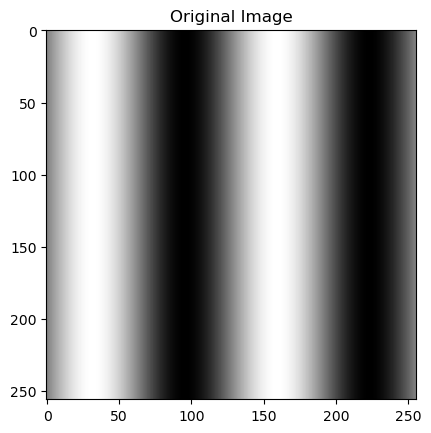

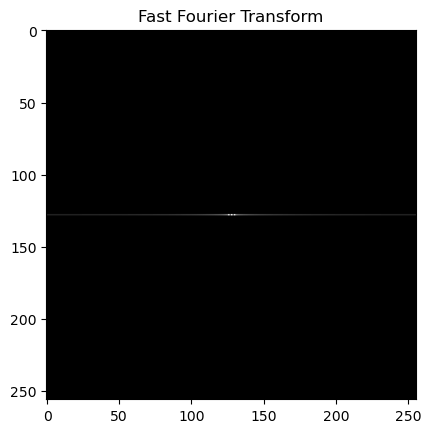

In [7]:
x, y = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 256), np.linspace(-2*np.pi, 2*np.pi, 256)) #x and y values range from -pi to pi
I = 0.5 * (1 + np.sin(x))
plt.figure()
plt.imshow(I,cmap = "gray")
plt.title("Original Image")

output = fft2(I)
output = np.fft.fftshift(output)

plt.figure()
plt.imshow(np.log(1 + np.abs(output)),cmap = "gray")
plt.title("Fast Fourier Transform")

Text(0.5, 1.0, 'Fast Fourier Transform')

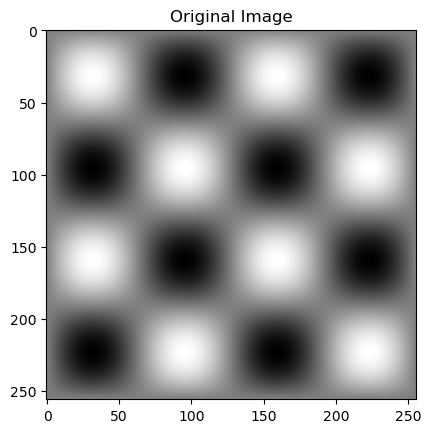

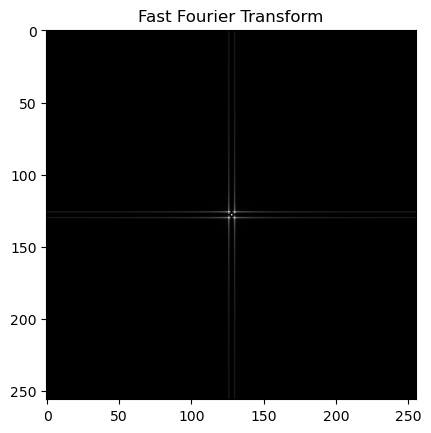

In [8]:
I = 0.5 * (1 + (np.sin(x) * np.sin(y)))

plt.figure()
plt.imshow(I,cmap = "gray")
plt.title("Original Image")
output = fft2(I)
output = np.fft.fftshift(output)

plt.figure()
plt.imshow(np.log(1 + np.abs(output)),cmap = "gray")
plt.title("Fast Fourier Transform")

Text(0.5, 1.0, 'Fast Fourier Transform')

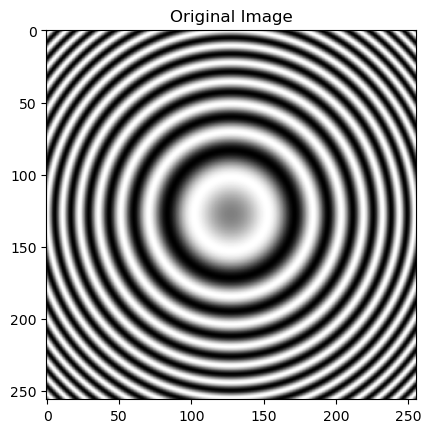

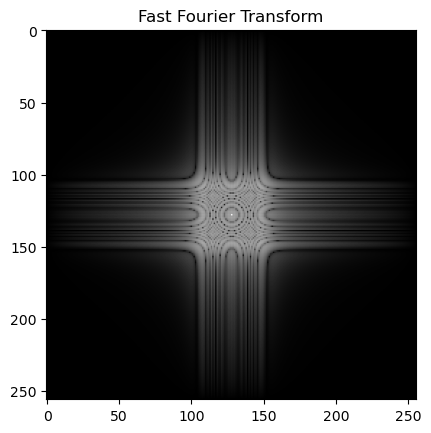

In [9]:
I = 0.5 * (1 + (np.sin(x**2 + y**2)))
plt.figure()
plt.imshow(I,cmap = "gray")
plt.title("Original Image")

output = fft2(I)
output = np.fft.fftshift(output)

plt.figure()
plt.imshow(np.log(1 + np.abs(output)),cmap = "gray")
plt.title("Fast Fourier Transform")

Text(0.5, 1.0, 'DFT of the DFT')

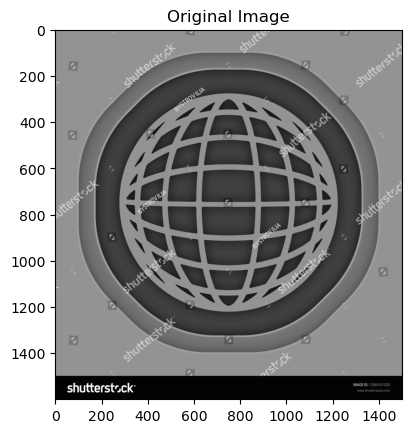

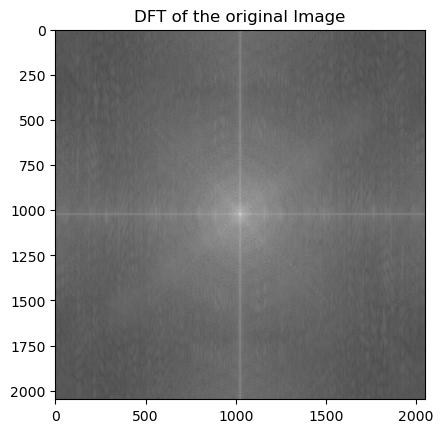

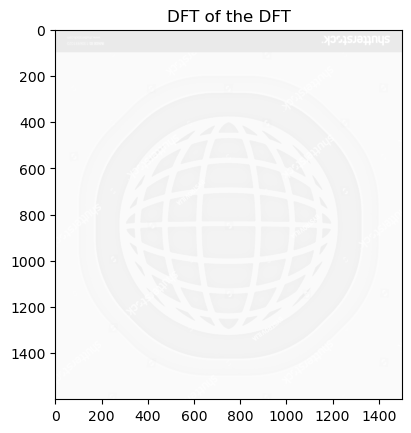

In [10]:
img = cv.imread("1024_1024.jpg")
plt.figure()
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap = "gray")
plt.title("Original Image")

result = fft2(img)
result = np.fft.fftshift(result)
plt.figure()
plt.imshow(np.log(1 + np.abs(result)),cmap = "gray")
plt.title("DFT of the original Image")

M,N = img.shape[0:2]
padx,pady = 2**np.ceil(np.log2(M)), 2**np.ceil(np.log2(N))
plt.figure()
result2 = fft2(result)
plt.imshow(np.log(1 + np.abs(result2[int(padx) - M :, int(pady) - N :])),cmap = "gray")
plt.title("DFT of the DFT")

Text(0.5, 1.0, 'Inverse FFT plot')

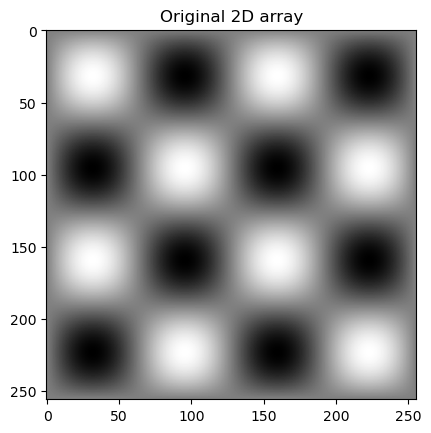

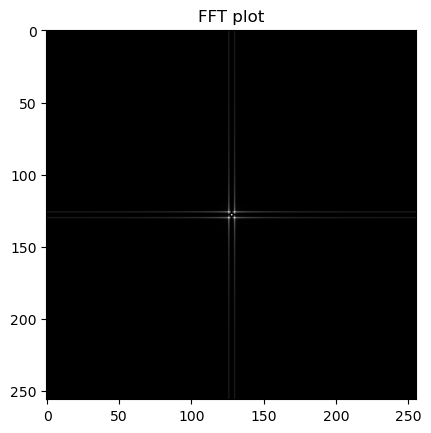

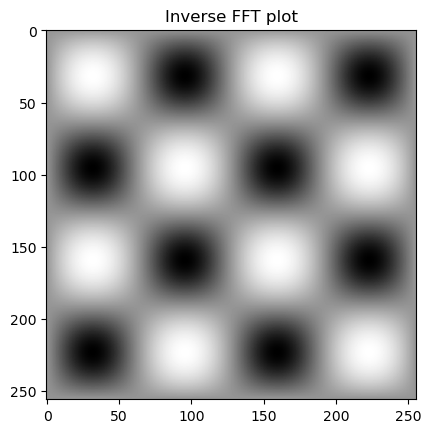

In [11]:
I = 0.5 * (1 + (np.sin(x) * np.sin(y)))
plt.figure()
plt.imshow(I,cmap = "gray")
plt.title("Original 2D array")

output = fft2(I)
output = np.fft.fftshift(output)
plt.figure()
plt.imshow(np.log(1 + np.abs(output)),cmap = "gray")
plt.title("FFT plot")

output = np.fft.ifftshift(output)
output = ifft2(output)
plt.figure()
plt.imshow(np.log(1 + np.abs(output)),cmap = "gray")
plt.title("Inverse FFT plot")



<h1> Question 2 - LOW PASS FILTER </h1>

1. The idealLPF() function computes the fft of the input image and generates a filter mask (rectangular function) based on the given cuttoff frequency and then convolutes it with the input image.

2. The higher the cutoff frequency, the fewer the frequencies that are filtered out in the output image.

3. The gaussianLPF() function computes the guassian low pass filtered image of the input, based on its cutoff frequency.

4. The guassianFilter() function from the previous assignment has been included. We observe that the guassianFilter() function causes the image to become more or less blurred, depending on the parameters. On the other hand, the gaussianLPF() function causes the image to become less brighter because it filters out all frequencies higher than a specific cutoff frequency

In [33]:
def idealLPF(img,D0):
    M,N = img.shape[0:2]
    fft = fft2(img)
    fft = np.fft.fftshift(fft)
    
    padx,pady = 2**np.ceil(np.log2(M)), 2**np.ceil(np.log2(N))
    x = np.arange(M) - M // 2
    y = np.arange(N) - N // 2
    x, y = np.meshgrid(y, x)
    filterk = np.sqrt(x**2 + y**2) <= D0
    
    filterk = fft[int(padx) - M: , int(pady) - N:] * filterk
    output = ifft2(filterk)
    return  np.log(1 + np.abs(output))

def gaussianLPF(img,D0):
    M,N = img.shape[0:2]
    fft = fft2(img)
    fft = np.fft.fftshift(fft)
    
    padx,pady = 2**np.ceil(np.log2(M)), 2**np.ceil(np.log2(N))
    x = np.arange(M) - M // 2
    y = np.arange(N) - N // 2
    x, y = np.meshgrid(y, x)
    filterk = np.exp(-(x**2 + y**2) / (2 * D0**2))
    
    filterk = fft[int(padx) - M: , int(pady) - N:] * filterk
    output = ifft2(filterk)
    return  np.log(1 + np.abs(output))

Text(0.5, 1.0, 'Ideal low pass filtered image (cutoff freq = 300)')

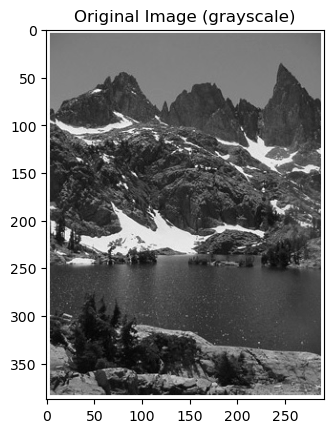

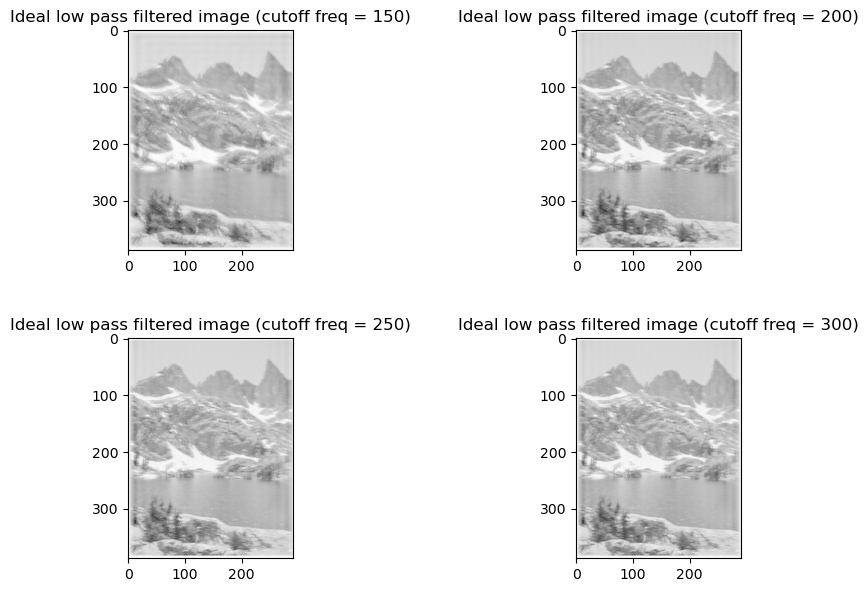

In [34]:
img = cv.imread("lakeside.jpg")
plt.figure()
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
plt.title("Original Image (grayscale)")

D0 = 150
output = idealLPF(img,D0)
plt.figure()
plt.subplot(2,2,1)
# adjust spacing between plots
plt.subplots_adjust(left=0.3,
                    bottom=0.1,
                    right=1.5,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.4)
plt.imshow(output,cmap="gray")
plt.title("Ideal low pass filtered image (cutoff freq = 150)")

D0 = 200
output = idealLPF(img,D0)
plt.subplot(2,2,2)
plt.imshow(output,cmap="gray")
plt.title("Ideal low pass filtered image (cutoff freq = 200)")

D0 = 250
output = idealLPF(img,D0)
plt.subplot(2,2,3)
plt.imshow(output,cmap="gray")
plt.title("Ideal low pass filtered image (cutoff freq = 250)")

D0 = 300
output = idealLPF(img,D0)
plt.subplot(2,2,4)
plt.imshow(output,cmap="gray")
plt.title("Ideal low pass filtered image (cutoff freq = 300)")

Text(0.5, 1.0, 'Gaussian low pass filtered image (cutoff freq = 300)')

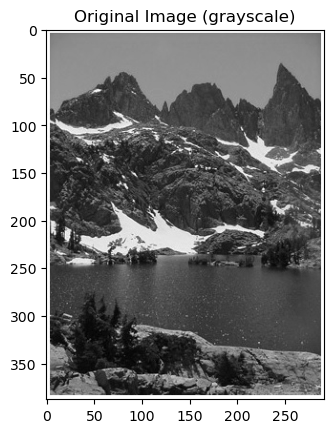

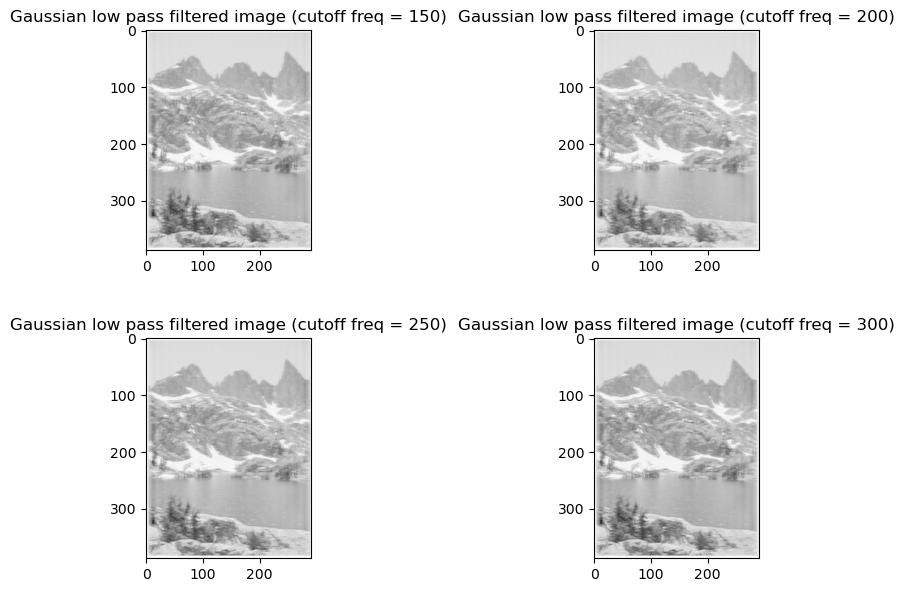

In [35]:
img = cv.imread("lakeside.jpg")
img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(img,cmap="gray")
plt.title("Original Image (grayscale)")

plt.figure()
D0 = 150
output = gaussianLPF(img,D0)
plt.subplot(2,2,1)
# adjust spacing between plots
plt.subplots_adjust(left=0.3,
                    bottom=0.1,
                    right=1.5,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.4)
plt.imshow(output,cmap="gray")
plt.title("Gaussian low pass filtered image (cutoff freq = 150)")

D0 = 200
output = gaussianLPF(img,D0)
plt.subplot(2,2,2)
plt.imshow(output,cmap="gray")
plt.title("Gaussian low pass filtered image (cutoff freq = 200)")

D0 = 250
output = gaussianLPF(img,D0)
plt.subplot(2,2,3)
plt.imshow(output,cmap="gray")
plt.title("Gaussian low pass filtered image (cutoff freq = 250)")

D0 = 300
output = gaussianLPF(img,D0)
plt.subplot(2,2,4)
plt.imshow(output,cmap="gray")
plt.title("Gaussian low pass filtered image (cutoff freq = 300)")

In [49]:
def conv2D(img,kernel):
    h,w = img.shape[0:2]
    k = kernel.shape[0]
    padding = int(k/2)
    
    padded = np.pad(img,int(k/2), 'constant', constant_values=(0))
    output = np.zeros((h,w))
    for i in range(padding, h+padding):
        for j in range(padding, w+padding):
            # print(padded[j-padding: j+padding+1, i-padding: i+padding+1])
            output[i - padding,j-padding] = (kernel * padded[i-padding: i+padding+1, j-padding: j+padding+1]).sum()
    
    output = (np.stack((output,output,output),axis=2)).astype(np.uint8) #stacking the channels together
    return output

def guassianFilter(img,size,sd):
    kernel = np.zeros((size,size))
    # gaussian filter has different values based on sd
    norm = 0
    den1 = 2*sd*sd
    ranges = int(size/2)
    
    for i in range(-ranges,ranges+1):
        for j in range(-ranges,ranges+1):
            exp = np.exp(-((i*i + j*j)/den1))
            exp/=den1*np.pi
            kernel[i+ranges,j+ranges] = exp
            norm+=exp
            
    kernel = kernel/norm
    return conv2D(img,kernel)

Text(0.5, 1.0, 'Gaussian filter output (size = 3, sd = 10)')

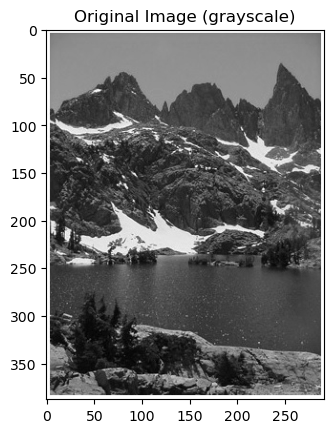

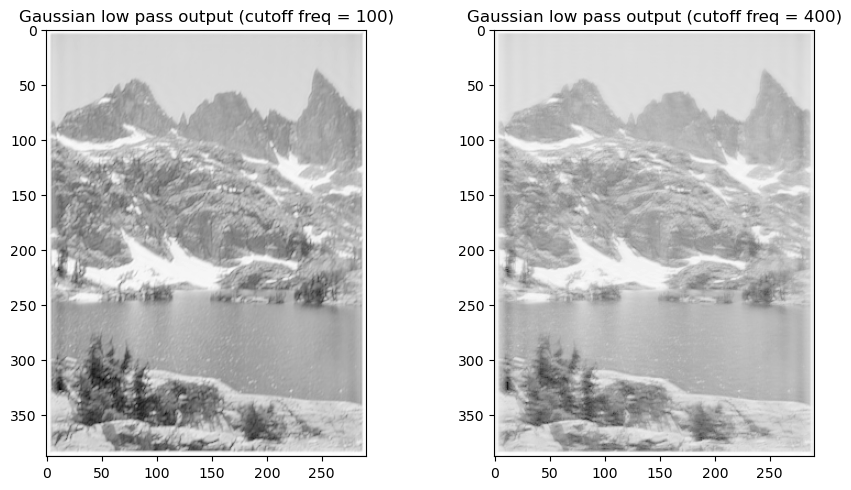

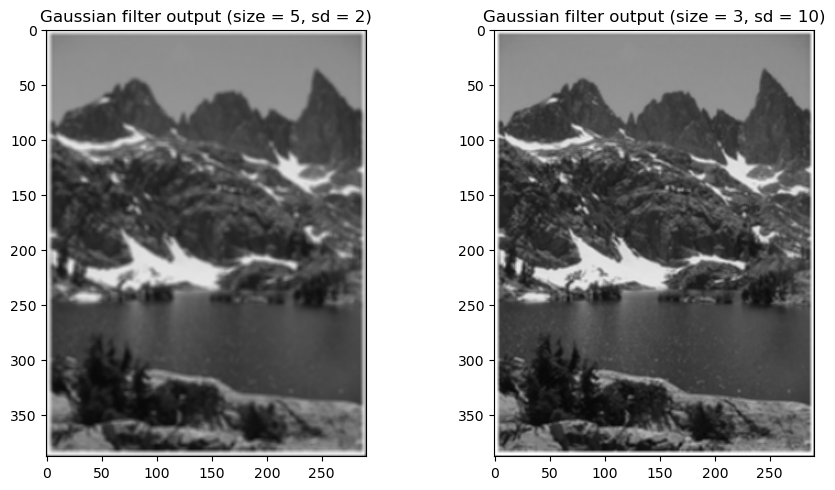

In [37]:
# gaussian smoothing filter
img = cv.imread("lakeside.jpg")
img = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(img,cmap="gray")
plt.title("Original Image (grayscale)")

# gaussian low pass filter
plt.figure()
plt.subplot(1,2,1)
# adjust spacing between plots
plt.subplots_adjust(left=0.3,
                    bottom=0.1,
                    right=1.5,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.4)

output = gaussianLPF(img,100)
plt.imshow(output,cmap="gray")
plt.title("Gaussian low pass output (cutoff freq = 100)")

plt.subplot(1,2,2)
output = gaussianLPF(img,400)
plt.imshow(output,cmap="gray")
plt.title("Gaussian low pass output (cutoff freq = 400)")

plt.figure()
plt.subplot(1,2,1)
# adjust spacing between plots
plt.subplots_adjust(left=0.3,
                    bottom=0.1,
                    right=1.5,
                    top=1.2,
                    wspace=0.4,
                    hspace=0.4)

output = guassianFilter(img,5,2) # 5 is kernel size
plt.imshow(output,cmap="gray")
plt.title("Gaussian filter output (size = 5, sd = 2)")

plt.subplot(1,2,2)
output = guassianFilter(img,3,10)
plt.imshow(output,cmap="gray")
plt.title("Gaussian filter output (size = 3, sd = 10)")

<h1> Question 3 - IMAGE RESTORATION </h1>

To restore the image, I use a combination of both the ideal and gaussian low pass filter functions to filter out the random noise frequencies present in the image.

Text(0.5, 1.0, 'Guassian Filtered Image')

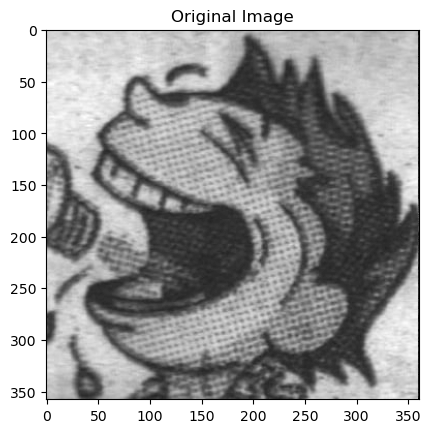

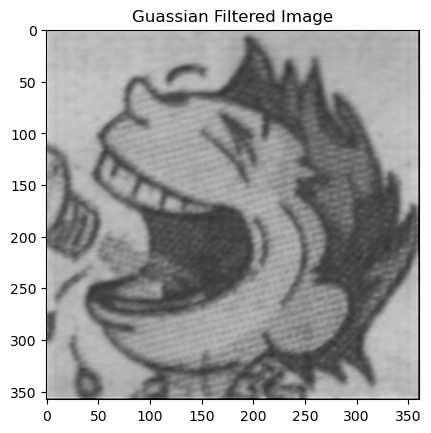

In [48]:
img = cv.imread("cart.jpg")
plt.figure()
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")
plt.title("Original Image")

D0 = 150
output = idealLPF(img,D0)
D0 = 70
output = gaussianLPF(output,D0)
plt.figure()
plt.imshow(output,cmap = "gray")
plt.title("Guassian Filtered Image")